# Lab 13

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

__In Class Exercise 1__

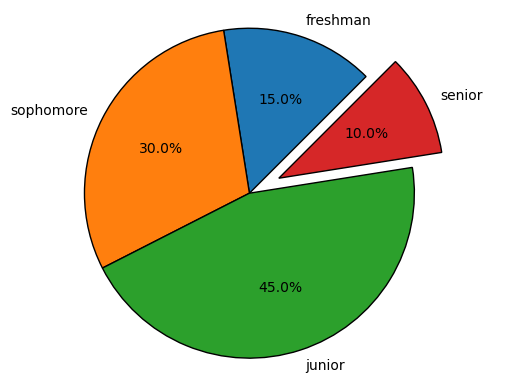

In [2]:
labels = "freshman", "sophomore", "junior", "senior"
numbers = [15, 30, 45, 10] #percentages
explode = (0, 0, 0, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(numbers, explode = explode, labels = labels, autopct = '%1.1f%%',
       shadow = False, startangle = 45, wedgeprops = {'linewidth': 1, "edgecolor": "black"})
ax1.axis('equal')

plt.show()

__In Class Exercise 3__

In [3]:
broome_data = pd.read_csv("Broome_County_Annual_Employee_Earnings__Beginning_2009.csv")

Three things we could visualize from this dataset
1. Comparing fulltime to parttime workers
2. Line graph comparing how many years spent in the department to regular earnings
3. Position title, years, and regular earnings

__In Class Exercise 4__

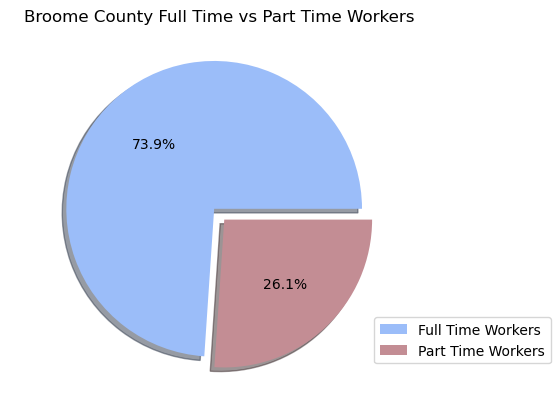

In [4]:
full_part = broome_data["Full or Part Time"]
counted = full_part.value_counts()
colors = ["#9BBDF9", "#C38D94"]
ax = counted.plot(kind = "pie", legend = True, title = "Broome County Full Time vs Part Time Workers",
                 ylabel = " ", labeldistance = None, autopct = '%1.1f%%',
                 colors = colors, shadow = True, explode = [.05, .05])
ax.legend(["Full Time Workers", "Part Time Workers"], bbox_to_anchor = (.9, .24))

plt.show()

# Post Lab

In [5]:
babynames = pd.read_csv("Popular_Baby_Names.csv")

_1. Using techinques from our last lab, create two dataframes -- one out of the girls' names and one out of the boys' names. Hint: you will need to use the drop() and evaluate the column's contents using your == or != operator_

In [6]:
girlnames = babynames.copy()
girlnames.drop(girlnames[(girlnames["Gender"] != "FEMALE")].index, inplace = True)

boynames = babynames.copy()
boynames.drop(boynames[(boynames["Gender"] != "MALE")].index, inplace = True)

_2. Using techinques from our last lab, make sure all the names and ethnicities are either all lower case or all upper case to prevent any problems later on_

In [7]:
girlnames["Ethnicity"] = girlnames["Ethnicity"].str.upper()
girlnames["Child's First Name"] = girlnames["Child's First Name"].str.upper()
boynames["Ethnicity"] = boynames["Ethnicity"].str.upper()
boynames["Child's First Name"] = boynames["Child's First Name"].str.upper()
girlnames

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
...,...,...,...,...,...,...
49504,2018,FEMALE,BLACK NON HISPANIC,NALA,10,40
49505,2018,FEMALE,BLACK NON HISPANIC,ROYALTY,10,40
49506,2018,FEMALE,BLACK NON HISPANIC,SARIYAH,10,40
49507,2018,FEMALE,BLACK NON HISPANIC,SIMONE,10,40


_3. In the dataframe of girls' names, isolate the "Child's First Name" column and use value_counts() to figure out which names appeared the most times on the list. Store that in a variable_

In [8]:
firstname = girlnames["Child's First Name"]
popular_names = firstname.value_counts()

_4. Use that variable above to create a dataframe. You should now have a dataframe that has two columns that contain the (1) top ten names and the (2) frequency of of that name_

In [9]:
popular_names_amt = pd.DataFrame(firstname.value_counts().reset_index().values, columns = ["Name", "Frequency"])

popular_names_amt

,Name,Frequency
0,GRACE,99
1,KAYLA,98
2,MICHELLE,98
3,ARIANA,98
4,HANNAH,98
...,...,...
1072,SAMA,1
1073,SHEA,1
1074,BELEN,1
1075,YUNA,1


_5. Take the top ten entries off of that dataframe and store it in a variable_

In [10]:
popular_names_amt = popular_names_amt.head(10)

popular_names_amt

,Name,Frequency
0,GRACE,99
1,KAYLA,98
2,MICHELLE,98
3,ARIANA,98
4,HANNAH,98
5,MAYA,98
6,MADISON,97
7,HAILEY,97
8,AVA,97
9,SARAH,97


_6. Run the code below to create a very basic bar graph, but plug in your own data for lines 2 and lines 3. In a comment or markdown cell, explain what could be improved upon_

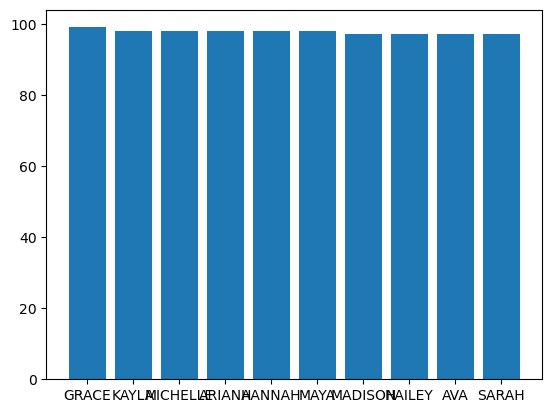

In [11]:
fig, ax = plt.subplots()
number = popular_names_amt["Frequency"] #isolate frequency column
names = popular_names_amt["Name"] #isolate names column
ax.bar(names, number)

plt.show()

Improvments:
- make the names smaller so they don't overlap
- don't start the graph at 0 so its easier to see the change between each name
- change the color

_7. Add a legend and title to the bar graph above and change the color of the columns_

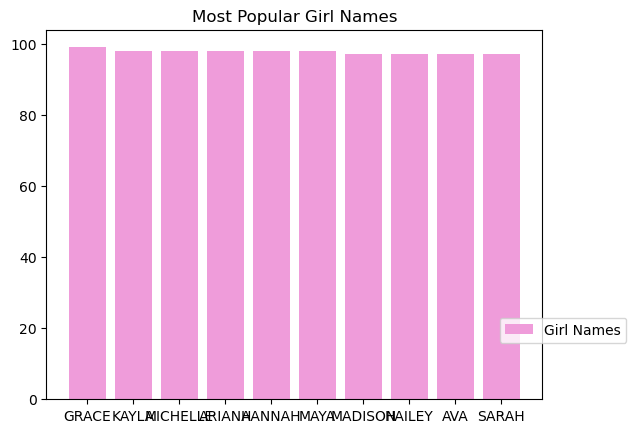

In [12]:
fig, ax = plt.subplots()
number = popular_names_amt["Frequency"]
names = popular_names_amt["Name"]
ax.bar(names, number, .8, color = "#EF9CDA")
ax.legend(["Girl Names"], bbox_to_anchor = (.9, .24))
ax.set_title("Most Popular Girl Names")

plt.show()

_8. Repeat the same steps above to the the top ten most common male names + visualization_

In [13]:
firstboyname = boynames["Child's First Name"]
popular_boynames_amt = pd.DataFrame(firstboyname.value_counts().reset_index().values, columns = ["Name", "Frequency"])
popular_boynames_amt = popular_boynames_amt.head(10)

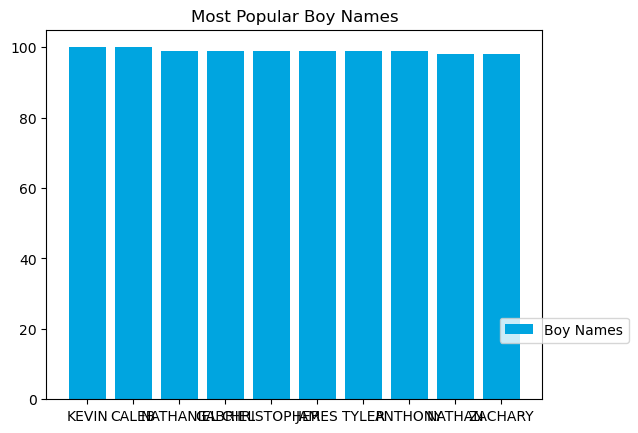

In [14]:
fig, ax = plt.subplots()
boynumber = popular_boynames_amt["Frequency"]
boynames = popular_boynames_amt["Name"]
ax.bar(boynames, boynumber, .8, color = "#00A5E0")
ax.legend(["Boy Names"], bbox_to_anchor = (.9, .24))
ax.set_title("Most Popular Boy Names")

plt.show()

_Bonus: Isolate the most popular girl names from one of the ethnicities listed & visualize it_

In [15]:
bonus_exercise = girlnames.copy()
bonus_exercise.drop(bonus_exercise[(bonus_exercise["Ethnicity"] != "BLACK NON HISPANIC")].index, inplace = True)
bonus_exercisenames = bonus_exercise["Child's First Name"]
bonus_amt = pd.DataFrame(bonus_exercisenames.value_counts().reset_index().values, columns = ["Name", "Frequency"])
bonus_amt = bonus_amt.head(10)

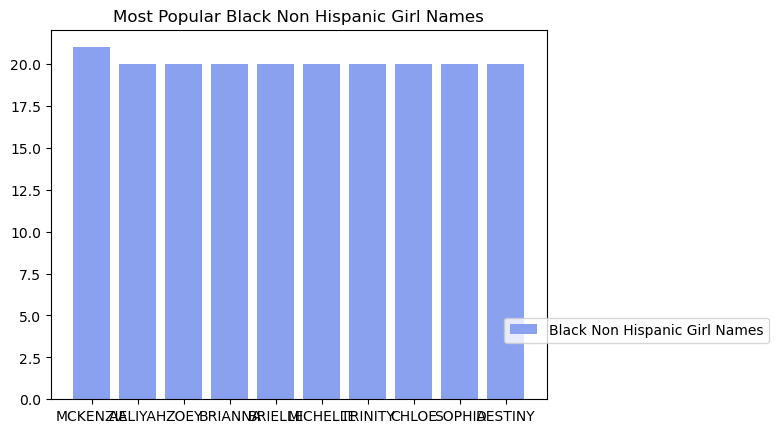

In [16]:
fig, ax = plt.subplots()
bonusnumber = bonus_amt["Frequency"]
bonusnames = bonus_amt["Name"] 
ax.bar(bonusnames, bonusnumber, .8, color = "#89A1EF")
ax.legend(["Black Non Hispanic Girl Names"], bbox_to_anchor = (.9, .24))
ax.set_title("Most Popular Black Non Hispanic Girl Names")

plt.show()

__Work Cited:__

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html